In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import geopandas as gpd
from datetime import datetime as dt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as mcm
import matplotlib.ticker as mticker
%matplotlib inline 

In [2]:
pop=pd.read_csv('C:\\Users\\xuebi\\Desktop\\Summer 2017 REU\\New_York_City_Population_By_Census_Tracts.csv')
ct=pd.read_csv('C:\\Users\\xuebi\\Desktop\\Summer 2017 REU\\census_tracts.csv')
mbt=pd.read_csv('C:\\Users\\xuebi\\Desktop\\Summer 2017 REU\\monthly_by_tract.csv')

In [3]:
mbt.rename(columns=dict(zip(mbt.columns[2:],mbt.columns[2:].str[:-2])),inplace=True)
#getting the columns starting from 2 and getting the 7 digit put of it

In [4]:
mbt.head()

complaint_type created_date  1000100  1000201  1000202  1000500  \
0    Dirty Conditions   2004-01-31      NaN      NaN      NaN      NaN   
1  Water Conservation   2004-01-31      NaN      NaN      NaN      NaN   
2                Snow   2004-01-31      NaN      NaN      NaN      NaN   
3       Water Quality   2004-01-31      NaN      NaN      NaN      NaN   
4          Electrical   2004-01-31      NaN      NaN      NaN      NaN   

   1000600  1000700  1000800  1000900   ...     5027706  5027900  5029102  \
0      NaN      NaN      NaN      NaN   ...         NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN   ...         NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN   ...         NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN   ...         NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN   ...         NaN      NaN      NaN   

   5029103  5029104  5030301  5030302  5031901  5031902  5032300  
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN  

[5 rows x 2165 columns]

In [5]:
mbt['created_date']=pd.to_datetime(mbt['created_date'])
#changing the columns into datetime 
mbt2010=mbt[mbt['created_date'].dt.year==2010]
#dt.year==____ is the extracting datetime out 

In [6]:
mbt2010.head()

complaint_type created_date  1000100  1000201  1000202  \
1717  General Construction/Plumbing   2010-01-31      NaN      3.0      1.0   
1718                          Noise   2010-01-31      NaN      1.0      1.0   
1719                   Building/Use   2010-01-31      NaN      NaN      NaN   
1720                       PLUMBING   2010-01-31      NaN      NaN      1.0   
1721                   Water System   2010-01-31      NaN      2.0      4.0   

      1000500  1000600  1000700  1000800  1000900   ...     5027706  5027900  \
1717      NaN      6.0      4.0      7.0      2.0   ...         NaN      1.0   
1718      NaN      NaN      8.0      1.0      1.0   ...         2.0      NaN   
1719      NaN      1.0      NaN      NaN      NaN   ...         NaN      NaN   
1720      NaN      2.0      NaN      3.0      NaN   ...         NaN      NaN   
1721      NaN      NaN      1.0      NaN      3.0   ...         NaN      4.0   

      5029102  5029103  5029104  5030301  5030302  5031901  5031902  5032300  
1717      2.0      NaN      3.0      NaN      1.0      1.0      3.0      1.0  
1718      NaN      1.0      1.0      1.0     21.0      NaN      NaN      NaN  
1719      1.0      3.0      1.0      1.0      3.0      1.0      1.0      1.0  
1720      2.0      1.0      3.0      1.0      1.0      2.0     11.0      1.0  
1721      5.0     10.0      4.0      NaN      4.0      4.0      3.0      2.0  

[5 rows x 2165 columns]

In [7]:
calls=pd.melt(mbt2010,id_vars=['complaint_type','created_date'],var_name=['boro_ct201'])

In [8]:
med_mbt2010=calls.groupby(['created_date','boro_ct201']).agg({'value':'median'})['value']
#group it by created_date, boro_ct201, and for the value column we take the median

In [9]:
norm_mbt2010=med_mbt2010.unstack().mean(axis=0)

# Sewer

In [10]:
sewer=calls[calls['complaint_type'].str.match('Sewer')]
sewer.head()

complaint_type created_date boro_ct201  value
16           Sewer   2010-01-31    1000100    NaN
40           Sewer   2010-02-28    1000100    NaN
68           Sewer   2010-03-31    1000100    NaN
94           Sewer   2010-04-30    1000100    NaN
103          Sewer   2010-05-31    1000100    NaN

In [11]:
sw=sewer.pivot_table(index='created_date',columns='boro_ct201')['value']
sw.head()

boro_ct201    1000201  1000202  1000600  1000700  1000800  1000900  1001001  \
created_date                                                                  
2010-01-31        NaN      1.0      NaN      6.0      NaN      2.0      NaN   
2010-02-28        NaN      1.0      1.0      5.0      3.0      5.0      2.0   
2010-03-31        NaN      2.0      2.0      NaN      3.0      7.0      2.0   
2010-04-30        2.0      1.0      2.0      NaN      1.0      3.0      NaN   
2010-05-31        NaN      NaN      1.0      1.0      NaN      3.0      NaN   

boro_ct201    1001002  1001200  1001300   ...     5027706  5027900  5029102  \
created_date                              ...                                 
2010-01-31        3.0      2.0      NaN   ...         NaN      1.0      3.0   
2010-02-28        NaN      NaN      1.0   ...         5.0      2.0      4.0   
2010-03-31        2.0      2.0      4.0   ...         NaN      8.0     26.0   
2010-04-30        2.0      NaN      3.0   ...         2.0      2.0      5.0   
2010-05-31        NaN      2.0      1.0   ...         NaN      NaN      6.0   

boro_ct201    5029103  5029104  5030301  5030302  5031901  5031902  5032300  
created_date                                                                 
2010-01-31        4.0      7.0      1.0      2.0      NaN      3.0      2.0  
2010-02-28        4.0      6.0      1.0      1.0      1.0      1.0      1.0  
2010-03-31       24.0     11.0      4.0      6.0      3.0      8.0      1.0  
2010-04-30       11.0      4.0      NaN      5.0      NaN      2.0      NaN  
2010-05-31        6.0      7.0      2.0     10.0      3.0      NaN      1.0  

[5 rows x 2132 columns]

In [12]:
sewer_tracts=dict()
for s in sw:
    sewer_tracts[s]=sw[s]/norm_mbt2010[s]
sdf=pd.DataFrame(sewer_tracts)

In [13]:
sdf

1000201   1000202   1000600   1000700  1000800   1000900  \
created_date                                                              
2010-01-31         NaN  0.571429       NaN  2.440678      NaN  0.761905   
2010-02-28         NaN  0.571429  0.428571  2.033898     0.96  1.904762   
2010-03-31         NaN  1.142857  0.857143       NaN     0.96  2.666667   
2010-04-30    1.142857  0.571429  0.857143       NaN     0.32  1.142857   
2010-05-31         NaN       NaN  0.428571  0.406780      NaN  1.142857   
2010-06-30    1.142857  1.142857       NaN  2.440678     0.32  1.523810   
2010-07-31         NaN  0.571429       NaN       NaN      NaN  1.142857   
2010-08-31         NaN       NaN  0.428571  0.813559     0.64  0.761905   
2010-09-30         NaN  0.571429       NaN  1.627119     0.64  1.904762   
2010-10-31         NaN       NaN  1.714286  1.220339      NaN       NaN   
2010-11-30    0.571429       NaN  0.428571  1.220339      NaN  1.142857   
2010-12-31         NaN       NaN  0.857143  1.220339      NaN       NaN   

               1001001   1001002   1001200   1001300   ...      5027706  \
created_date                                           ...                
2010-01-31         NaN  1.107692  0.888889       NaN   ...          NaN   
2010-02-28    1.230769       NaN       NaN  0.406780   ...     3.157895   
2010-03-31    1.230769  0.738462  0.888889  1.627119   ...          NaN   
2010-04-30         NaN  0.738462       NaN  1.220339   ...     1.263158   
2010-05-31         NaN       NaN  0.888889  0.406780   ...          NaN   
2010-06-30    0.615385       NaN       NaN  0.406780   ...          NaN   
2010-07-31         NaN       NaN  0.444444  0.813559   ...     0.631579   
2010-08-31    0.615385       NaN       NaN  0.813559   ...     1.263158   
2010-09-30         NaN       NaN  0.444444  0.813559   ...          NaN   
2010-10-31         NaN       NaN       NaN  0.813559   ...     0.631579   
2010-11-30         NaN       NaN       NaN       NaN   ...          NaN   
2010-12-31         NaN       NaN  0.888889  0.406780   ...          NaN   

               5027900    5029102   5029103   5029104   5030301   5030302  \
created_date                                                                
2010-01-31    0.315789   1.220339  1.411765  2.434783  0.380952  0.685714   
2010-02-28    0.631579   1.627119  1.411765  2.086957  0.380952  0.342857   
2010-03-31    2.526316  10.576271  8.470588  3.826087  1.523810  2.057143   
2010-04-30    0.631579   2.033898  3.882353  1.391304       NaN  1.714286   
2010-05-31         NaN   2.440678  2.117647  2.434783  0.761905  3.428571   
2010-06-30    0.947368   3.661017       NaN  0.695652  1.904762  2.057143   
2010-07-31    0.315789   1.627119  0.705882  1.043478  1.904762  0.685714   
2010-08-31         NaN        NaN  0.352941  1.043478  1.523810  0.342857   
2010-09-30    0.315789   1.627119  1.058824  1.391304  0.380952  0.342857   
2010-10-31    0.947368   1.627119  1.411765       NaN  0.380952  1.028571   
2010-11-30    0.315789   2.847458  0.352941  0.347826  1.904762       NaN   
2010-12-31    0.315789   1.627119  1.411765  1.391304  0.380952  0.685714   

               5031901   5031902  5032300  
created_date                               
2010-01-31         NaN  0.986301      0.8  
2010-02-28    0.631579  0.328767      0.4  
2010-03-31    1.894737  2.630137      0.4  
2010-04-30         NaN  0.657534      NaN  
2010-05-31    1.894737       NaN      0.4  
2010-06-30         NaN  1.315068      NaN  
2010-07-31    2.526316  1.643836      0.4  
2010-08-31    0.631579  0.986301      NaN  
2010-09-30         NaN  2.630137      0.4  
2010-10-31    3.157895  1.315068      NaN  
2010-11-30    1.263158  0.657534      0.4  
2010-12-31    1.263158  1.315068      1.2  

[12 rows x 2132 columns]

In [14]:
Sum=sdf.sum(axis=0)

In [15]:
shpfile = 'C:\\Users\\xuebi\\Desktop\\census_tracts\\census_tracts\\census2010.shp'
coord_system = {'init': 'epsg:4326'}#tells how the earth exist 
gdf = gpd.GeoDataFrame.from_file(shpfile, crs=coord_system)

In [16]:
tracts=gdf[['boro_ct201','geometry']].merge(Sum.to_frame(),
                   left_on='boro_ct201',right_index=True)
tracts.rename(columns={0:'Normalization'},inplace=True)
tracts.head()

boro_ct201                                           geometry  Normalization
0    5000900  POLYGON ((-74.07920577013245 40.64343078374567...       2.847458
1    1009800  POLYGON ((-73.96432543478758 40.75638153099091...       5.538462
2    1010000  POLYGON ((-73.96802436915851 40.75957814005282...       8.603774
3    1010200  POLYGON ((-73.97124277307127 40.76093641847906...      15.555556
4    1010400  POLYGON ((-73.97445730550224 40.76229308352487...       7.200000

In [17]:
gmed=tracts['Normalization'].median()

# Population

In [18]:
pop2010=pop[pop['Year']==2010]
pop2010.head()

Borough  Year  FIPS County Code  DCP Borough Code  Census Tract  \
2168   Bronx  2010                 5                 2           100   
2169   Bronx  2010                 5                 2           200   
2170   Bronx  2010                 5                 2           400   
2171   Bronx  2010                 5                 2          1600   
2172   Bronx  2010                 5                 2          1900   

      Population  
2168       11091  
2169        4334  
2170        5503  
2171        5643  
2172        1917

In [19]:
pop2010.sort_values(by='Population',ascending=False).head()

Borough  Year  FIPS County Code  DCP Borough Code  Census Tract  \
2502      Bronx  2010                 5                 2         46201   
3312  Manhattan  2010                61                 1          4400   
3404  Manhattan  2010                61                 1         13600   
3522  Manhattan  2010                61                 1         24500   
3425  Manhattan  2010                61                 1         15400   

      Population  
2502       26588  
3312       16538  
3404       15344  
3522       14934  
3425       13749

In [20]:
ct['boro_ct201']=ct['boro_ct201'].astype(str)
#changing the column boro_ct201 as type to string 
ct.head()

boro_code boro_ct201      boro_name cdeligibil  ct2010  ctlabel  \
0          5    5000900  Staten Island          I     900      9.0   
1          1    1009800      Manhattan          I    9800     98.0   
2          1    1010000      Manhattan          I   10000    100.0   
3          1    1010200      Manhattan          I   10200    102.0   
4          1    1010400      Manhattan          I   10400    104.0   

                                            geometry ntacode  \
0  POLYGON ((-74.07920577013245 40.64343078374567...    SI22   
1  POLYGON ((-73.96432543478758 40.75638153099091...    MN19   
2  POLYGON ((-73.96802436915851 40.75957814005282...    MN19   
3  POLYGON ((-73.97124277307127 40.76093641847906...    MN17   
4  POLYGON ((-73.97445730550224 40.76229308352487...    MN17   

                                     ntaname  puma    shape_area   shape_leng  
0  West New Brighton-New Brighton-St. George  3903  2.497010e+06  7729.016794  
1                    Turtle Bay-East Midtown  3808  1.906016e+06  5534.199811  
2                    Turtle Bay-East Midtown  3808  1.860938e+06  5692.168737  
3                      Midtown-Midtown South  3807  1.860993e+06  5687.802439  
4                      Midtown-Midtown South  3807  1.864600e+06  5693.036367

In [21]:
def ccode(row):
    length=7
    n=length-len(str(row['DCP Borough Code'])+str(row['Census Tract']))
    return str(row['DCP Borough Code']).ljust(n+1,'0')+str(row['Census Tract'])

In [22]:
pop2010['boro_ct201']=pop2010.apply(ccode,axis=1)
#adding a column into pop2010 with the the census tract code

C:\Users\xuebi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
df=pop2010.merge(ct,left_on='boro_ct201',right_on='boro_ct201',how='inner')
#mergin two dataframe together 
df.head()

Borough  Year  FIPS County Code  DCP Borough Code  Census Tract  Population  \
0   Bronx  2010                 5                 2           100       11091   
1   Bronx  2010                 5                 2           200        4334   
2   Bronx  2010                 5                 2           400        5503   
3   Bronx  2010                 5                 2          1600        5643   
4   Bronx  2010                 5                 2          1900        1917   

  boro_ct201  boro_code boro_name cdeligibil  ct2010  ctlabel  \
0    2000100          2     Bronx          I     100      1.0   
1    2000200          2     Bronx          I     200      2.0   
2    2000400          2     Bronx          I     400      4.0   
3    2001600          2     Bronx          E    1600     16.0   
4    2001900          2     Bronx          I    1900     19.0   

                                            geometry ntacode  \
0  POLYGON ((-73.87287195903875 40.78597502780474...    BX98   
1  POLYGON ((-73.85651604030653 40.80524122047516...    BX09   
2  POLYGON ((-73.84610660457847 40.81309998920543...    BX09   
3  POLYGON ((-73.85513639815333 40.82243618931003...    BX09   
4  MULTIPOLYGON (((-73.89680883223774 40.79580844...    BX39   

                                           ntaname  puma    shape_area  \
0                                    Rikers Island  3710  1.815460e+07   
1  Soundview-Castle Hill-Clason Point-Harding Park  3709  5.004821e+06   
2  Soundview-Castle Hill-Clason Point-Harding Park  3709  8.562150e+06   
3  Soundview-Castle Hill-Clason Point-Harding Park  3709  5.221330e+06   
4                           Mott Haven-Port Morris  3710  1.796448e+07   

     shape_leng  
0  18903.346729  
1  15591.282743  
2  24707.079004  
3   9671.306205  
4  29989.844817

In [24]:
df['boro_ct201']=df['boro_ct201'].astype(str)
#changing the dtype to str

In [25]:
df.head()

Borough  Year  FIPS County Code  DCP Borough Code  Census Tract  Population  \
0   Bronx  2010                 5                 2           100       11091   
1   Bronx  2010                 5                 2           200        4334   
2   Bronx  2010                 5                 2           400        5503   
3   Bronx  2010                 5                 2          1600        5643   
4   Bronx  2010                 5                 2          1900        1917   

  boro_ct201  boro_code boro_name cdeligibil  ct2010  ctlabel  \
0    2000100          2     Bronx          I     100      1.0   
1    2000200          2     Bronx          I     200      2.0   
2    2000400          2     Bronx          I     400      4.0   
3    2001600          2     Bronx          E    1600     16.0   
4    2001900          2     Bronx          I    1900     19.0   

                                            geometry ntacode  \
0  POLYGON ((-73.87287195903875 40.78597502780474...    BX98   
1  POLYGON ((-73.85651604030653 40.80524122047516...    BX09   
2  POLYGON ((-73.84610660457847 40.81309998920543...    BX09   
3  POLYGON ((-73.85513639815333 40.82243618931003...    BX09   
4  MULTIPOLYGON (((-73.89680883223774 40.79580844...    BX39   

                                           ntaname  puma    shape_area  \
0                                    Rikers Island  3710  1.815460e+07   
1  Soundview-Castle Hill-Clason Point-Harding Park  3709  5.004821e+06   
2  Soundview-Castle Hill-Clason Point-Harding Park  3709  8.562150e+06   
3  Soundview-Castle Hill-Clason Point-Harding Park  3709  5.221330e+06   
4                           Mott Haven-Port Morris  3710  1.796448e+07   

     shape_leng  
0  18903.346729  
1  15591.282743  
2  24707.079004  
3   9671.306205  
4  29989.844817

In [26]:
nottracts=mbt.columns[~mbt.columns.isin(['complaint_type','created_date'])]
#this is a dataframe with all the tracts

calls2010=mbt2010[nottracts].sum(axis=0)
#sum up all the 2010 tracts 
calls2010.head()

1000100      0.0
1000201    159.0
1000202    455.0
1000500      1.0
1000600    756.0
dtype: float64

In [27]:
pc2010=df.merge(calls2010.to_frame(),right_index=True,left_on='boro_ct201')
pc2010.rename(columns={0:'Total_complaints'},inplace=True)
pc2010.head()

Borough  Year  FIPS County Code  DCP Borough Code  Census Tract  Population  \
0   Bronx  2010                 5                 2           100       11091   
1   Bronx  2010                 5                 2           200        4334   
2   Bronx  2010                 5                 2           400        5503   
3   Bronx  2010                 5                 2          1600        5643   
4   Bronx  2010                 5                 2          1900        1917   

  boro_ct201  boro_code boro_name cdeligibil  ct2010  ctlabel  \
0    2000100          2     Bronx          I     100      1.0   
1    2000200          2     Bronx          I     200      2.0   
2    2000400          2     Bronx          I     400      4.0   
3    2001600          2     Bronx          E    1600     16.0   
4    2001900          2     Bronx          I    1900     19.0   

                                            geometry ntacode  \
0  POLYGON ((-73.87287195903875 40.78597502780474...    BX98   
1  POLYGON ((-73.85651604030653 40.80524122047516...    BX09   
2  POLYGON ((-73.84610660457847 40.81309998920543...    BX09   
3  POLYGON ((-73.85513639815333 40.82243618931003...    BX09   
4  MULTIPOLYGON (((-73.89680883223774 40.79580844...    BX39   

                                           ntaname  puma    shape_area  \
0                                    Rikers Island  3710  1.815460e+07   
1  Soundview-Castle Hill-Clason Point-Harding Park  3709  5.004821e+06   
2  Soundview-Castle Hill-Clason Point-Harding Park  3709  8.562150e+06   
3  Soundview-Castle Hill-Clason Point-Harding Park  3709  5.221330e+06   
4                           Mott Haven-Port Morris  3710  1.796448e+07   

     shape_leng  Total_complaints  
0  18903.346729               2.0  
1  15591.282743             690.0  
2  24707.079004             564.0  
3   9671.306205             618.0  
4  29989.844817             751.0

In [28]:
pc2010['Per_cap']=pc2010['Total_complaints']/pc2010['Population']

In [29]:
pc2010

Borough  Year  FIPS County Code  DCP Borough Code  Census Tract  \
0             Bronx  2010                 5                 2           100   
1             Bronx  2010                 5                 2           200   
2             Bronx  2010                 5                 2           400   
3             Bronx  2010                 5                 2          1600   
4             Bronx  2010                 5                 2          1900   
5             Bronx  2010                 5                 2          2000   
6             Bronx  2010                 5                 2          2300   
7             Bronx  2010                 5                 2          2400   
8             Bronx  2010                 5                 2          2500   
9             Bronx  2010                 5                 2          2701   
10            Bronx  2010                 5                 2          2702   
11            Bronx  2010                 5                 2          2800   
12            Bronx  2010                 5                 2          3100   
13            Bronx  2010                 5                 2          3300   
14            Bronx  2010                 5                 2          3500   
15            Bronx  2010                 5                 2          3700   
16            Bronx  2010                 5                 2          3800   
17            Bronx  2010                 5                 2          3900   
18            Bronx  2010                 5                 2          4001   
19            Bronx  2010                 5                 2          4100   
20            Bronx  2010                 5                 2          4200   
21            Bronx  2010                 5                 2          4300   
22            Bronx  2010                 5                 2          4400   
23            Bronx  2010                 5                 2          4600   
24            Bronx  2010                 5                 2          4800   
25            Bronx  2010                 5                 2          5001   
26            Bronx  2010                 5                 2          5002   
27            Bronx  2010                 5                 2          5100   
28            Bronx  2010                 5                 2          5200   
29            Bronx  2010                 5                 2          5300   
...             ...   ...               ...               ...           ...   
2135  Staten Island  2010                85                 5         20700   
2136  Staten Island  2010                85                 5         20801   
2137  Staten Island  2010                85                 5         20803   
2138  Staten Island  2010                85                 5         20804   
2139  Staten Island  2010                85                 5         21300   
2140  Staten Island  2010                85                 5         22300   
2141  Staten Island  2010                85                 5         22600   
2142  Staten Island  2010                85                 5         22800   
2143  Staten Island  2010                85                 5         23100   
2144  Staten Island  2010                85                 5         23900   
2145  Staten Island  2010                85                 5         24401   
2146  Staten Island  2010                85                 5         24402   
2147  Staten Island  2010                85                 5         24700   
2148  Staten Island  2010                85                 5         24800   
2149  Staten Island  2010                85                 5         25100   
2150  Staten Island  2010                85                 5         27301   
2151  Staten Island  2010                85                 5         27302   
2152  Staten Island  2010                85                 5         27702   
2153  Staten Island  2010                85                 5 

In [30]:
tracts2=tracts.merge(pc2010[['Per_cap','boro_ct201']],right_on='boro_ct201',left_on='boro_ct201')

In [31]:
tracts2.head()

boro_ct201                                           geometry  \
0    5000900  POLYGON ((-74.07920577013245 40.64343078374567...   
1    1009800  POLYGON ((-73.96432543478758 40.75638153099091...   
2    1010000  POLYGON ((-73.96802436915851 40.75957814005282...   
3    1010200  POLYGON ((-73.97124277307127 40.76093641847906...   
4    1010400  POLYGON ((-73.97445730550224 40.76229308352487...   

   Normalization   Per_cap  
0       2.847458  0.255208  
1       5.538462  0.128075  
2       8.603774  0.247992  
3      15.555556  1.491304  
4       7.200000  0.396480

In [32]:
pmed=tracts2['Per_cap'].median()

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


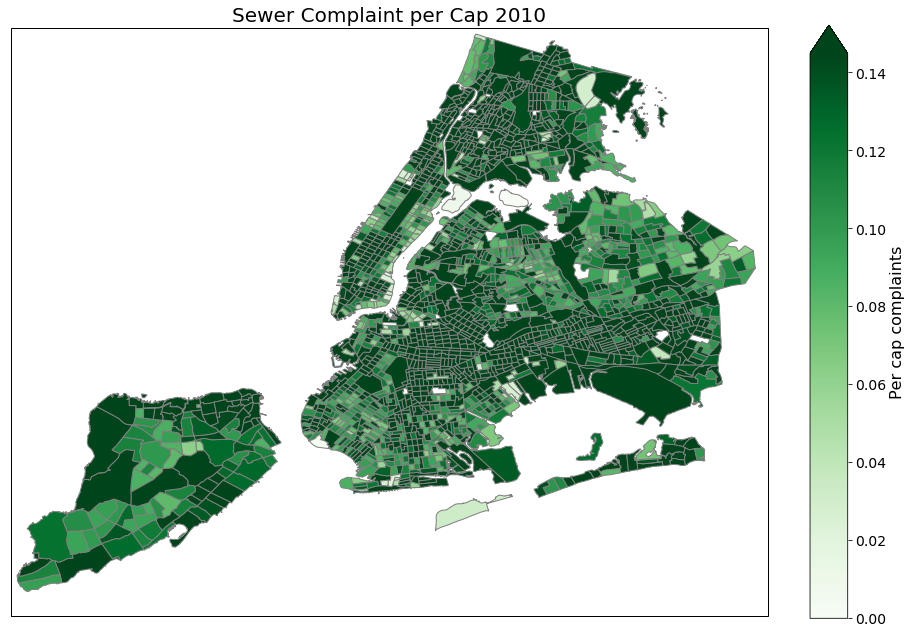

In [33]:
cmap=mcm.Greens
norm=mcolors.Normalize(vmin=0,vmax=pmed)
#bins = np.arange(0,10,2)
#norm = mcolors.BoundaryNorm(bins, cmap.N)
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(15, 15),
                           subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
    #get bounding box for city
    #[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], 
                  ccrs.Geodetic())
ax.set_title(f"Complaint per Cap 2010",fontsize=20)
for _, row in tracts2.iterrows():
    color = cmap(norm(row['Per_cap']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],
                              facecolor=color, edgecolor='grey')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15,extend='max')
cb.ax.tick_params(labelsize=14)
cb.set_label("Per cap complaints" , fontsize=16)
fig.show() 

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


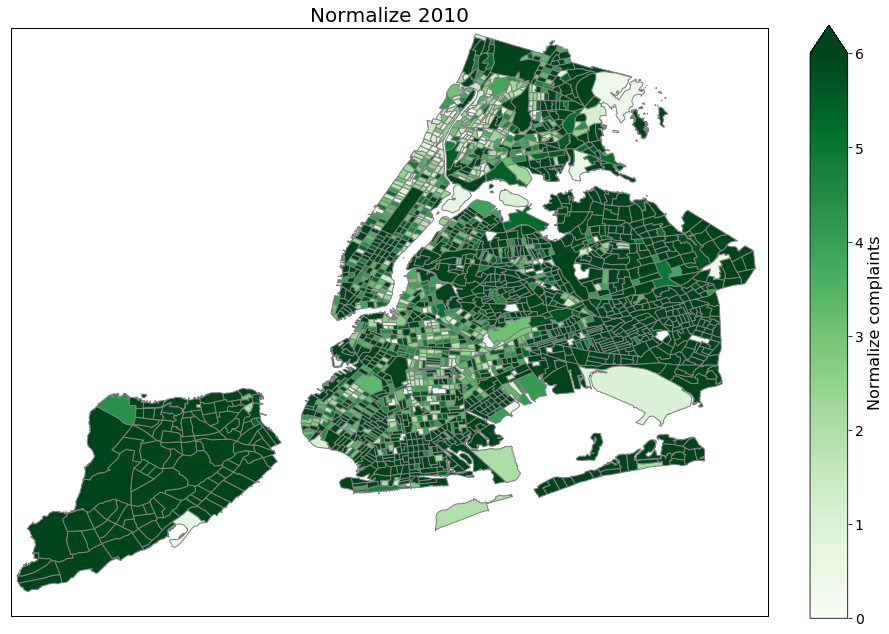

In [34]:

cmap=mcm.Greens
norm=mcolors.Normalize(vmin=0,vmax=gmed)
#bins = np.arange(0,10,2)
#norm = mcolors.BoundaryNorm(bins, cmap.N)
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(15, 15),
                           subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
    #get bounding box for city
    #[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], 
                  ccrs.Geodetic())
ax.set_title(f"Normalize 2010",fontsize=20)
for _, row in tracts2.iterrows():
    color = cmap(norm(row['Normalization']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],
                              facecolor=color, edgecolor='grey')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15,extend='max')
cb.ax.tick_params(labelsize=14)
cb.set_label("Normalize complaints" , fontsize=16)
fig.show() 

In [35]:
tracts2['Normalization'].max()

75.299999999999983

In [36]:
tracts2['Per_cap'].corr(norm_mbt2010)

nan

In [37]:
tracts3=tracts2.merge(norm_mbt2010.to_frame(),
                   left_on='boro_ct201',right_index=True)
tracts3.rename(columns={0:'NF'},inplace=True)

In [38]:
tracts3

boro_ct201                                           geometry  \
0       5000900  POLYGON ((-74.07920577013245 40.64343078374567...   
1       1009800  POLYGON ((-73.96432543478758 40.75638153099091...   
2       1010000  POLYGON ((-73.96802436915851 40.75957814005282...   
3       1010200  POLYGON ((-73.97124277307127 40.76093641847906...   
4       1010400  POLYGON ((-73.97445730550224 40.76229308352487...   
5       1011300  POLYGON ((-73.98411754823195 40.7548420534646,...   
6       1011402  POLYGON ((-73.96475544914023 40.76405707059968...   
7       1013000  POLYGON ((-73.96147581181627 40.77432401139124...   
8       1014000  POLYGON ((-73.95494520074165 40.77750394666422...   
9       1014801  POLYGON ((-73.95398370221397 40.77882211011827...   
10      1015300  POLYGON ((-73.97691168292398 40.77490912402713...   
11      1015400  POLYGON ((-73.94566981579243 40.78194717618918...   
12      1018400  POLYGON ((-73.94181428695792 40.80123649161298...   
13      1019000  POLYGON ((-73.94505127984516 40.80259859871748...   
14      1020102  POLYGON ((-73.95441604408759 40.80572517971817...   
15      1020600  POLYGON ((-73.93580780201182 40.80949763825763...   
16      1025300  POLYGON ((-73.9375174030009 40.84413733103844,...   
17      1025700  POLYGON ((-73.95067975582074 40.81084296435382...   
18      1026100  POLYGON ((-73.93139355381945 40.84742823140986...   
19      1026300  POLYGON ((-73.9342394636615 40.84862621124213,...   
20      1026900  POLYGON ((-73.92769565738116 40.8524877821057,...   
21      1027700  POLYGON ((-73.92769565738116 40.8524877821057,...   
22      3000501  POLYGON ((-73.99301822153384 40.6974623645668,...   
23      3002000  POLYGON ((-74.01266264860631 40.64925555478156...   
24      3004100  POLYGON ((-73.98181677448231 40.68732980276495...   
25      3005202  POLYGON ((-74.03809447949381 40.62058489897851...   
26      3005800  POLYGON ((-74.02956408409689 40.61983253935202...   
27      3006000  POLYGON ((-74.02835031608427 40.62279862692517...   
28      3006700  POLYGON ((-73.99440802432692 40.68545249599622...   
29      3006900  POLYGON ((-73.98828896785815 40.68586869554736...   
...         ...                                                ...   
2102    4038302  POLYGON ((-73.84670933730233 40.76134526863438...   
2103    1031704  POLYGON ((-74.01662424491339 40.7121573189952,...   
2104    1000900  (POLYGON ((-74.00078295341706 40.6942865156646...   
2105    4066300  POLYGON ((-73.86986857005927 40.72163812936617...   
2106    4066501  POLYGON ((-73.88092035215946 40.7216030384517,...   
2107    4056200  POLYGON ((-73.72990781057175 40.72327301185798...   
2108    4162100  POLYGON ((-73.72766348711401 40.73110699320743...   
2109    4049900  POLYGON ((-73.8775219576593 40.73159316921632,...   
2110    4050700  POLYGON ((-73.87470829607915 40.72709019682126...   
2111    5002001  POLYGON ((-74.06517091250778 40.6042135088463,...   
2112    5003600  POLYGON ((-74.07119033272556 40.61151669716841...   
2113    5002002  POLYGON ((-74.06350565594251 40.60215005483083...   
2114    5005000  POLYGON ((-74.08155470057721 40.60629029707039...   
2115    4061800  POLYGON ((-73.73499207425658 40.67850647957908...   
2116    4063200  POLYGON ((-73.73854615011732 40.67962729177709...   
2117    4061602  POLYGON ((-73.72586264182358 40.68324108094788...   
2118    4063800  POLYGON ((-73.72755616356449 40.67416158819153...   
2119    3001100  POLYGON ((-73.9851430608965 40.69488514296982,...   
2120    3001500  POLYGON ((-73.980509261823 40.69744627453864, ...   
2121    2030701  POLYGON ((-73.90746255742523 40.89939465744014...   
2122    2032300  POLYGON ((-73.90321502320394 40.91012889731734...   
2123    4096400  POLYGON ((-73.79042048230907 40.59475269500825...   
2124    4097203  (POLYGON ((-73.79028151177359 40.5960514161062...   
2125    4097202  POLYGON ((-73.76978825596231 40.59075090723353...   
2126    4097204  POLYGON ((-73.77271340746334 40.59332111353351...   
2127    5022300

In [39]:
tracts3['Per_cap']=tracts3['Per_cap'].replace([np.inf, -np.inf], np.nan)

In [40]:
tracts3.describe()

Normalization      Per_cap           NF
count    2132.000000  2117.000000  2132.000000
mean        8.184406     0.318193     2.567393
std         7.162873     2.307927     1.075278
min         0.163265     0.000180     1.000000
25%         3.243243     0.103540     1.875000
50%         6.000000     0.144139     2.291667
75%        10.915995     0.222718     2.958333
max        75.300000    68.000000     8.625000

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


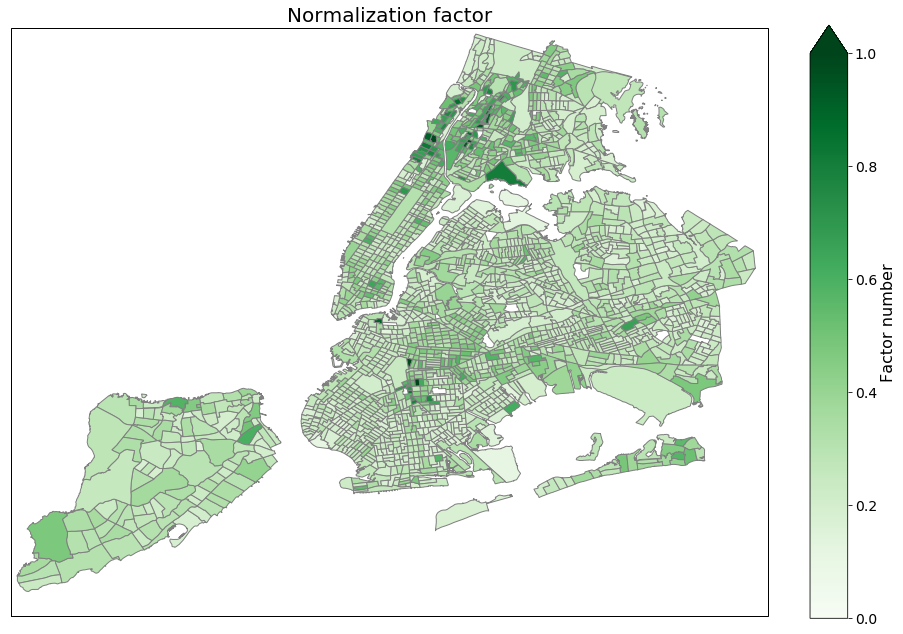

In [41]:
cmap=mcm.Greens
norm=mcolors.Normalize(vmin=0,vmax=1)
#bins = np.arange(0,10,2)
#norm = mcolors.BoundaryNorm(bins, cmap.N)
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(15, 15),
                           subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
    #get bounding box for city
    #[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], 
                  ccrs.Geodetic())
ax.set_title(f"Normalization factor",fontsize=20)
for _, row in tracts3.iterrows():
    try:
        cp = row['NF']/tracts3['NF'].max()
        if not np.isfinite(cp):
            color="white"
        else:
            color = cmap(norm(cp))
    except ZeroDivisionError:
        color = "White"
    ax.add_geometries([row['geometry']], subplot_kw['projection'],facecolor=color, edgecolor='grey')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15,extend='max')
cb.ax.tick_params(labelsize=14)
cb.set_label("Factor number" , fontsize=16)
fig.show() 

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


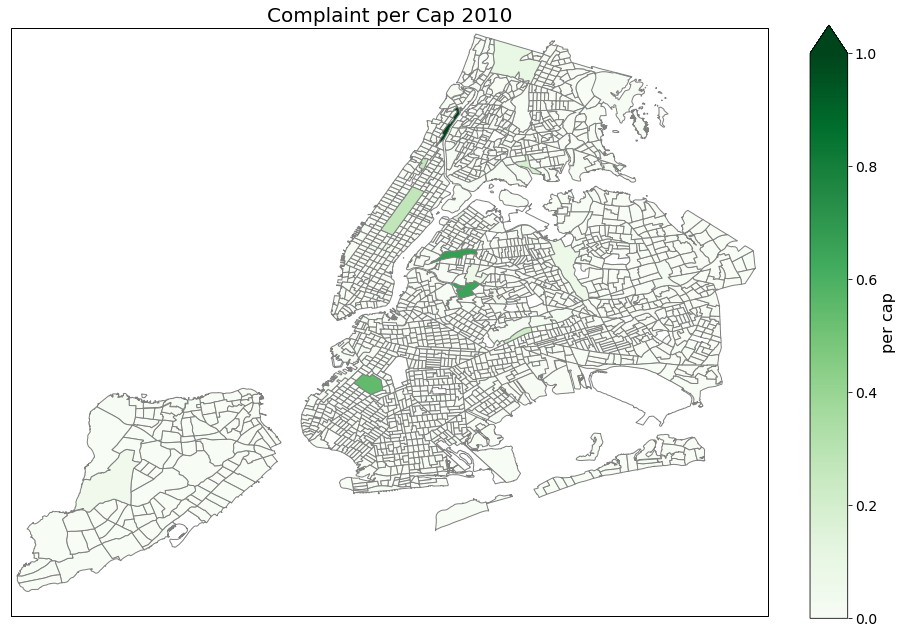

In [42]:
cmap=mcm.Greens
norm=mcolors.Normalize(vmin=0,vmax=1)
#bins = np.arange(0,10,2)
#norm = mcolors.BoundaryNorm(bins, cmap.N)
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(15, 15),
                           subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
    #get bounding box for city
    #[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], 
                  ccrs.Geodetic())
ax.set_title(f"Complaint per Cap 2010",fontsize=20)
for _, row in tracts3.iterrows():
    try:
        cp = row['Per_cap']/tracts3['Per_cap'].max()
        if not np.isfinite(cp):
            color="white"
        else:
            color = cmap(norm(cp))
    except ZeroDivisionError:
        color = "White"
    ax.add_geometries([row['geometry']], subplot_kw['projection'],facecolor=color, edgecolor='grey')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15,extend='max')
cb.ax.tick_params(labelsize=14)
cb.set_label("per cap" , fontsize=16)
fig.show() 

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


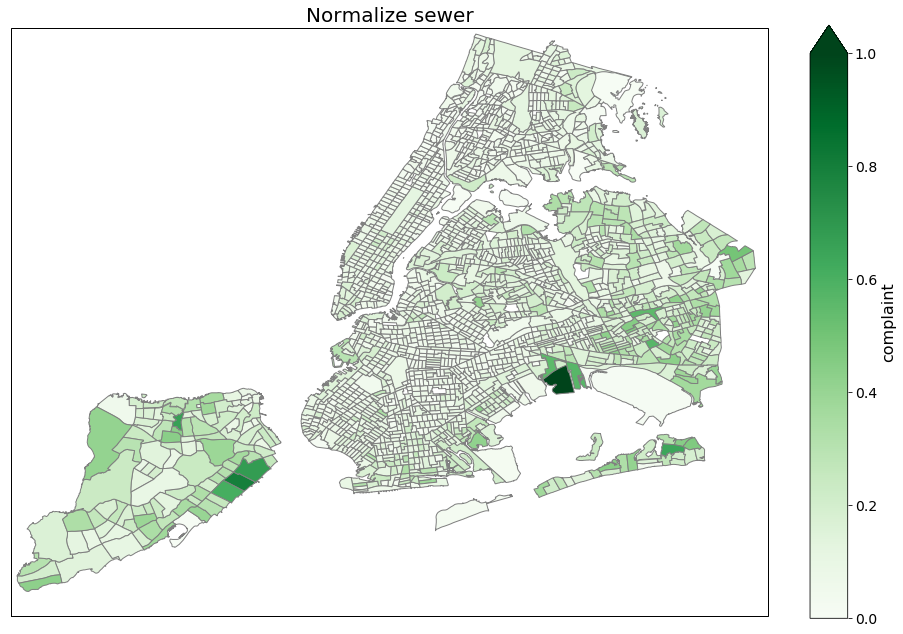

In [60]:
cmap=mcm.Greens
norm=mcolors.Normalize(vmin=0,vmax=1)
#bins = np.arange(0,10,2)
#norm = mcolors.BoundaryNorm(bins, cmap.N)
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(15, 15),
                           subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
    #get bounding box for city
    #[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], 
                  ccrs.Geodetic())
ax.set_title(f"Normalize sewer",fontsize=20)
for _, row in tracts3.iterrows():
    try:
        cp = row['Normalization']/tracts3['Normalization'].max()
        if not np.isfinite(cp):
            color="white"
        else:
            color = cmap(norm(cp))
    except ZeroDivisionError:
        color = "White"
    ax.add_geometries([row['geometry']], subplot_kw['projection'],facecolor=color, edgecolor='grey')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15,extend='max')
cb.ax.tick_params(labelsize=14)
cb.set_label("complaint" , fontsize=16)
fig.show() 

In [64]:
tracts3[['NF','Per_cap']].corr()

NF   Per_cap
NF       1.000000 -0.007979
Per_cap -0.007979  1.000000

In [43]:
tracts3['Per_cap'].corr(tracts3['NF'])

-0.0079790764688180017

In [44]:
tracts3['Per_cap'].corr(tracts3['Normalization'])

-0.014081274691394457

In [45]:
for i in tracts3['Per_cap']:
    print(i)

0.255208333333
0.128075451066
0.247991967871
1.49130434783
0.396480331263
2.76923076923
0.148518982061
0.0820023837902
0.0651478305388
0.0747467691233
0.0814377682403
0.0651683758819
0.0866624122527
0.104119364256
0.190685640362
0.225696804895
0.322534709861
0.251031991744
0.205510052122
0.278726085462
0.304817275748
0.303415184872
0.0623969861078
0.273923444976
0.0967204002223
0.145908907699
0.142449238579
0.155343241331
0.09391093608
0.140514560362
0.116125481563
0.120806890299
0.121546961326
0.130486927321
0.0884111617312
0.118250671879
0.0759516186411
0.100033852404
0.0791666666667
0.147890208931
0.0885311871227
0.0944733112896
0.165066777963
0.112103617686
0.116890080429
0.171886936593
0.161923454367
0.213157138753
0.0913918390162
0.100624794476
0.0907701711491
0.0834340991536
0.0872771972956
0.137495735244
0.133885438233
0.0527306967985
0.0765151515152
0.13843580092
0.131673881674
0.126475037821
0.195484254308
0.0882150241213
0.115605191669
0.108695652174
0.0714285714286
0.088582

0.342718873735
0.181919642857
0.16325203252
0.106467661692
0.114633087277
0.252517116391
0.124721311475
0.171469228033
0.172286940527
0.234387047032
0.308497383504
0.21034590215
0.220251146103
0.0322983954991
0.361870266711
0.255365987892
0.0483036227717
0.0943972835314
0.223541739434
0.23830197781
0.3017812454
0.0739203934225
0.12666485458
0.0669661512746
0.207503828484
0.104128440367
0.0895833333333
0.140943193998
0.238558216742
0.732342007435
0.14406779661
0.140572390572
0.179770992366
0.125766871166
0.128848886784
0.170574443142
0.131329113924
0.156154783668
0.157210401891
0.12511715089
0.0946706388613
0.0512820512821
0.0728989612842
0.0352726535577
0.091425326519
0.133537206932
0.163983440662
0.183227625088
0.107545533391
0.100565681961
0.0814771395076
0.213908450704
0.389405204461
0.0883588106837
0.604085603113
0.0941302791696
0.056823368325
0.0858902703319
0.0587130108032
0.141916478946
0.0949859856742
0.118325434439
0.068526379624
0.318286151492
0.169759450172
0.0729978738483
0

In [58]:
(tracts3['Per_cap']>1).sum()

25

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


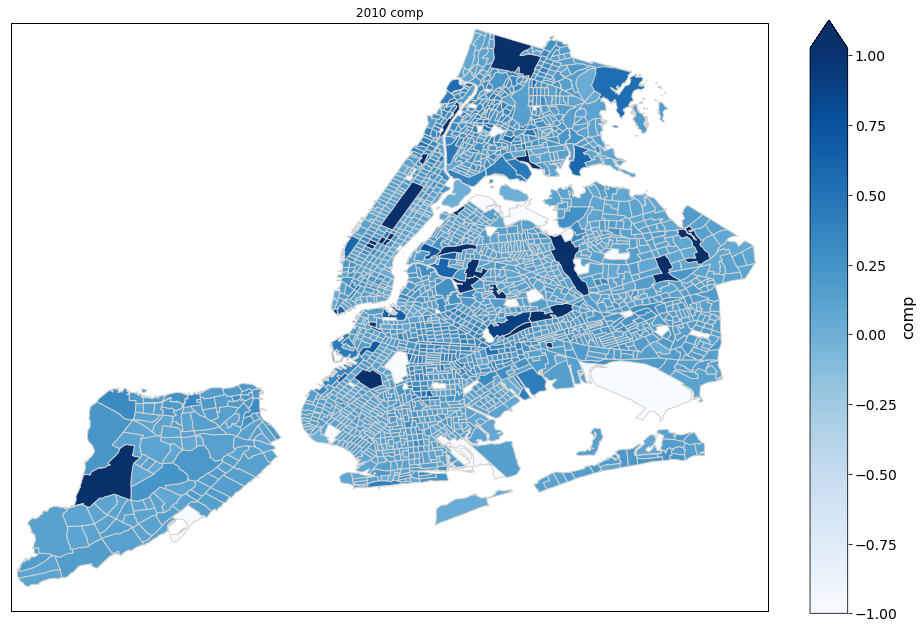

In [62]:
cmap=mcm.Blues
norm=mcolors.Normalize(vmin=-1,vmax=1.025)#the 50%tile 
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(15, 15),
                       subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], 
              ccrs.Geodetic())
ax.set_title(f"2010 comp")
for _, row in tracts3.iterrows():

    color = cmap(norm(row['Per_cap']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='lightgrey')
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15,extend='max')
cb.ax.tick_params(labelsize=14)
cb.set_label("comp" , fontsize=16)
#when temperature decrease we have heating increase 
#temperature increase we have heating decrease 
#this is why the map is negative corr
#fig.savefig('Correlation Between Weather Station and 311 Heating Complaints')